In [1]:
# if the jupyter kernel crushes, please try the .py example
import matplotlib.pyplot as plt
import numpy as np
import ccfj

In [2]:
data = np.load('summed.npz')
ncfs = data['ncfs']
nc = 1000
c = np.linspace(2000,5000,nc)
r = data['r']*1e3
f = data['f']

In [3]:
ds00 = ccfj.fj_noise(np.real(ncfs),r,c,f,fstride=1,itype=0,func=0)
ds01 = ccfj.fj_noise(np.real(ncfs),r,c,f,fstride=1,itype=1,func=0)
ds10 = ccfj.fj_noise(np.real(ncfs),r,c,f,fstride=1,itype=0,func=1)
ds11 = ccfj.fj_noise(np.real(ncfs),r,c,f,fstride=1,itype=1,func=1)

<ipython-input-4-f82f824815a0>:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0][0].pcolormesh(f,c/1e3,ds00,cmap='jet',vmin=0,vmax=0.8)
<ipython-input-4-f82f824815a0>:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  ax[0][1].pcolormesh(f,c/1e3,ds01,cmap='jet',vmin=0,vmax=0.8)
<ipython-input-4-f82f824815a0>:12: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of t

Text(0.5, 0, 'Frequency (Hz)')

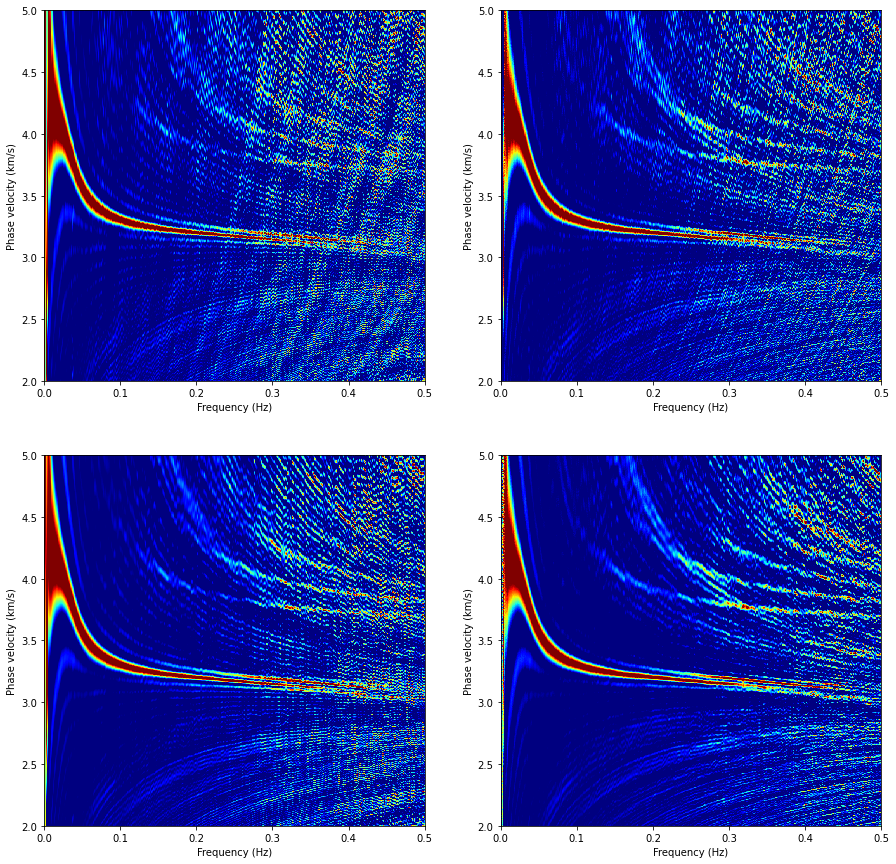

In [4]:
fig,ax=plt.subplots(nrows=2,ncols=2,figsize=(15,15))
ax[0][0].pcolormesh(f,c/1e3,ds00,cmap='jet',vmin=0,vmax=0.8)
ax[0][0].set_xlim([0,0.5])
ax[0][0].set_ylabel('Phase velocity (km/s)')
ax[0][0].set_xlabel('Frequency (Hz)')

ax[0][1].pcolormesh(f,c/1e3,ds01,cmap='jet',vmin=0,vmax=0.8)
ax[0][1].set_xlim([0,0.5])
ax[0][1].set_ylabel('Phase velocity (km/s)')
ax[0][1].set_xlabel('Frequency (Hz)')

ax[1][0].pcolormesh(f,c/1e3,ds10,cmap='jet',vmin=0,vmax=0.8)
ax[1][0].set_xlim([0,0.5])
ax[1][0].set_ylabel('Phase velocity (km/s)')
ax[1][0].set_xlabel('Frequency (Hz)')

ax[1][1].pcolormesh(f,c/1e3,ds11,cmap='jet',vmin=0,vmax=0.8)
ax[1][1].set_xlim([0,0.5])
ax[1][1].set_ylabel('Phase velocity (km/s)')
ax[1][1].set_xlabel('Frequency (Hz)')

In [5]:
ds = [ds00,ds01,ds10,ds11]
ds = np.array(ds)
np.shape(ds)

(4, 1000, 1000)

In [6]:
import h5py
h5file = h5py.File('ds.h5','w')
h5file.create_dataset('ds',data=ds)
h5file.create_dataset('f',data=f)
h5file.create_dataset('c',data=c)
h5file.close()